In [1]:
# In oder to use personal google drive as a directory for files, it will have to be mounted to the colab notebook.
# Only individuals that will be working with the code will have to do this, otherwise it will not be necessary.
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
Data_Science_Lifecycle_directory = 'drive/My Drive/Data Science Lifecycle in the Aerospace Industry'
All_Data = Data_Science_Lifecycle_directory + '/Data'

In [3]:
os.listdir(All_Data)

['UCS-Satellite-Database-10-1-Cleaned.xlsx',
 'UCS-Satellite-Database-10-1-Cleaned.csv',
 'Launch Sites-Wiki.xlsx',
 'Launch Sites-Wiki.csv',
 'LaunchLog.csv',
 'LaunchLog.xlsx',
 'UCS_Satellites.xlsx',
 'Oscar-Space Agencys_List_2021-03-25.xlsx']

# Abstract

The exponential advance not only of computational power but also the rapid spread of internet has given independent research groups and personal researchers massive amounts of data previously only available to whomever is able to afford data warehouses. The aforementioned push towards data has created another S.T.E.M. (Science Technology Engineering Mathematics) field that is very much a hot topic in the Tech world. This field is known as Data Science. Data Science, as a profession is a hybrid of software engineering/computer science, statistics, and mathematical modelling. Software knowledge enables researchers to benefit from coding in languages other than de-facto MATLAB to extract and manipulate data from various sources. Once the data is acquired, data analysis and statistical insight is needed to get an intuition of the various trends in the dataset using methods such as resampling methods. Then Machine learning models, such as neural networks which evolved out of various statistical approaches such as Bayesian theorem and Markov chains, can be created for forecasting. Regression-based mathematical models such as Principle Component Analysis (PCA), Least Means Square Error (LMSE) are quite popular in Business Intelligence today for time-series data. This research will be an explorative study with the aim of providing a variety of tools and techniques that are part of the Data Science lifecycle that can prove to be give a massive advantage to researchers in the Aerospace Industry. This lifecycle will be used to study global launch business and applied to various datasets found online.

# Aerospace Launch Business Data Analysis

# Introduction

NSBE's Aerospace Special Interest Group, East African Spaceport Feasibility study Team is conducting a study with the purpose defined as to "Investigate the feasibility of a spaceport in the East African Community (EAC) that could provide low cost, reliable access to space while stimulating African economic and technology advancement [1]." The purpose of the aformentioned research is rather clear, however, will eventually require various sources of information to prove the "low cost", "reliability" and other aspects of what would make a spaceport the perfect launchsite for whichever target orbit or applications. One would first be interested in investigating current global launch business and gain insight into the potential cost reduction and potential improvements.

# Extract Transform Load (ETL)

The Data Science Lifecycle typically starts with Extract, read the data, often from multiple sources; Transform, clean and structure the data in the desired form;Load, write the data into a database for storage. As defined by Microsoft Azure documentation: "Extract, transform, and load (ETL) is a data pipeline used to collect data from various sources, transform the data according to business rules, and load it inot a destination data store.[2]" This launch business data analysis will be using data from Wikipedia's list of rocket launch sites [3], UCS (Union for Concerned Scientists) [4], SpaceX's API [5], and Jonathan McDowell's Launch Log [6] can be used in the writing of a Launch Business case report. 

# Data Source 1 - List of Rocket Launch Sites (Wiki)

## Dependecies and Pre-Preprocessing (CSV Module)

In this section the preprocessing of the dataset will be done using user defined python functions created using the csv (comma separated values) module to parse the data, the numpy library to structure the data as arrarys, and finally create graphs using matplotlib. Some comments will be made regarding the advantages and distanvatages of this methodology.

In [ ]:
Launch_Sites_Wiki_Data_csv = All_Data + '/Launch Sites-Wiki.csv'
Launch_Sites_Wiki_Data_xlx = All_Data + '/Launch Sites-Wiki.xlsx'

### Extract Method 1

In [ ]:
# Importing the required modules
import csv
import numpy as np

### Creating a function using CSV Module
def create_input_matrix(input_file):

    # Open the input_file in read mode and output_file in write mode
    with open(input_file, 'r', encoding = "ISO-8859-1") as read_obj:
        # Create a csv.reader object from the input file object
        csv_reader = csv.reader(read_obj)
        headers = next(csv_reader)
        inputs = np.array(list(csv_reader))
    return headers, inputs

Launch_Sites_Method1 = create_input_matrix(Launch_Sites_Wiki_Data_csv)

In [ ]:
Launch_Sites_Method1_headers = Launch_Sites_Method1[0]
Launch_Sites_Method1_data = Launch_Sites_Method1[1]
print(len(Launch_Sites_Method1_headers))
print(Launch_Sites_Method1_data.shape)

10
(110, 10)


When using the csv module, We are expecting the data to come in as a list of lists. We can take a look at the headers and the shape of the data in order to know which variables we will use for analysis.

### Extract Method 2

In [ ]:
import csv
import numpy as np

### creating a function that converts lists to dictionary to hold our headers
def list2dictionary(keylist, valuelist):
    dictionary = {keylist[i]:valuelist[i] for i in range(0, len(valuelist),1)}
    return dictionary

### Creating a function using CSV Module
def create_single_numpy_matrix(thefile):
    with open(thefile,'r', encoding = "ISO-8859-1") as read_obj:
        #creates a csv.reader object from the input file object
        csv_reader = csv.reader(read_obj)
        #read the headers separately
        headers = next(csv_reader)
        # We want the headers to be dictionary keys with indexes as their values
        list_of_indexes_headers = [*range(len(headers))]
        headers_dict = list2dictionary(headers, list_of_indexes_headers)
        numpy_matrix = np.array(list(csv_reader))
    return headers_dict, numpy_matrix

#Launch_Sites_Wiki_csv2 = 'Data/Launch Sites-Wiki.csv'

# Function Call to create the matrix from the input data
Launch_Sites_Method2 = create_single_numpy_matrix(Launch_Sites_Wiki_Data_csv)

In [ ]:
Launch_Sites_Method2_headers = Launch_Sites_Method2[0]
Launch_Sites_Method2_data = Launch_Sites_Method2[1]

print(Launch_Sites_Method2_headers)
print(Launch_Sites_Method2_data.shape)

{'Continent': 0, 'Country': 1, 'Location': 2, 'Latitude': 3, 'Longitute': 4, 'Year Opened': 5, 'Year Closed': 6, 'Number of rocket launches': 7, 'Heaviest rocket launched': 8, 'Highest achieved Orbit': 9}
(110, 10)


In [ ]:
Launch_Sites_Method2_headers['Location']

2

In [ ]:
# Here we can get all the continents that are part of this dataset by slicing
Locations = Launch_Sites_Method2_data[:, Launch_Sites_Method2_headers['Location']]
print(type(Locations))

<class 'numpy.ndarray'>


## Location Analysis

In [ ]:
# Here we can get all the locations that are part of this dataset by slicing
Locations = Launch_Sites_Method2_data[:, 2]
print(type(Locations))

# Since we are pulling values from an ndarray, the initial Locations_List will be
# a list of lists - a column list or 1 x n vector
Locations_List = Locations.tolist()

# Printing the unique values from the the continents list
print(len(Locations_List))
np.unique(len(Locations_List))

<class 'numpy.ndarray'>
110


array([110])

In [ ]:
# Here we can get all the continents that are part of this dataset by slicing
Locations = Launch_Sites_Method2_data[:, 2]
print(type(Locations))

<class 'numpy.ndarray'>


## Launch Sites Per Continent Analysis

In [ ]:
# Here we can get all the continents that are part of this dataset by slicing
Continents = Launch_Sites_data[:, 0]
print(type(Continents))

<class 'numpy.ndarray'>


In [ ]:
# Since we are pulling values from an ndarray, the initial Continents_List will be
# a 2d numpy array into 1 x n vector and using a list (basic python data type) 
Continents_list = Continents.tolist()
print(type(Continents_list))

<class 'list'>


In [ ]:
#print(frequencies)
#print('\n'.join(''.join('{:4}'.format(item) for item in row) for row in frequencies))
#print('\n'.join(' '.join('{:3}'.format(item) for item in row) for row in matrix))

In [ ]:
# Printing the unique values from the the continents list
unique, counts = np.unique(Continents, return_counts=True)
frequencies = np.asarray((unique, counts)).T

for row in frequencies:
  print('\t'.join(map(str, row)))

	1
Africa	8
Asia	38
Europe	26
North America	16
Ocenia	5
South America	16


In [ ]:
# We can also get unique values and counts by converting back to a list of lists
Continents_List = list(np.concatenate(Continents_list).flat)
print(len(Continents_List))

110


In [ ]:
Continents_Counts = []
Continents_Counts.append(Continents_List.count('Africa'))
Continents_Counts.append(Continents_List.count('Asia'))
Continents_Counts.append(Continents_List.count('Europe'))
Continents_Counts.append(Continents_List.count('North America'))
Continents_Counts.append(Continents_List.count('Ocenia'))
Continents_Counts.append(Continents_List.count('South America'))
print(Continents_Counts)

[8, 38, 26, 16, 5, 16]


In [ ]:
# Here we are confirming that there is a row in the dataset that does not have a value for continent
Continents_List.count('')

1

The result of the above query can be tabulated below.

| Africa 	| Asia 	| Europe 	| North America 	| Ocenia 	| South America 	|
|:------:	|:----:	|:------:	|:-------------:	|:------:	|:-------------:	|
|    8   	|  38  	|   26   	|       16      	|    5   	|       16      	|

**Note** That there are a total number of values in the table but the total counts amounted to 110 which means that there is one row that has a missing entry in continent.

### Plotting - Bar Chart

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#matplotlib.rcParams['figure.figsize'] = [width, height]
plt.rcParams['figure.figsize'] = [20, 10]

In [ ]:
x_axis = np.arange(len(Continents_Counts))
print(x_axis)

[0 1 2 3 4 5]


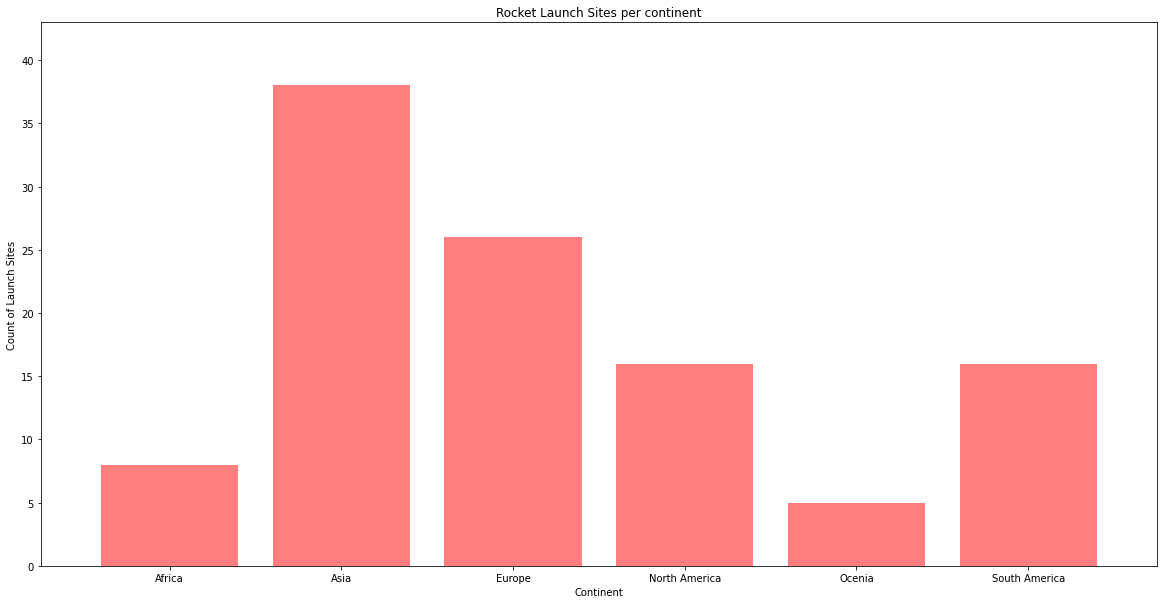

In [ ]:
# Telling Matplotlib where we would like to place each of our x-axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Africa", "Asia", "Europe","North America","Ocenia","South America"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(Continents_Counts)+5)
# Labels and a title
plt.title("Rocket Launch Sites per continent")
plt.xlabel("Continent")
plt.ylabel("Count of Launch Sites")
plt.bar(x_axis, Continents_Counts, color='r', alpha=0.5, align="center");

### Pie Chart

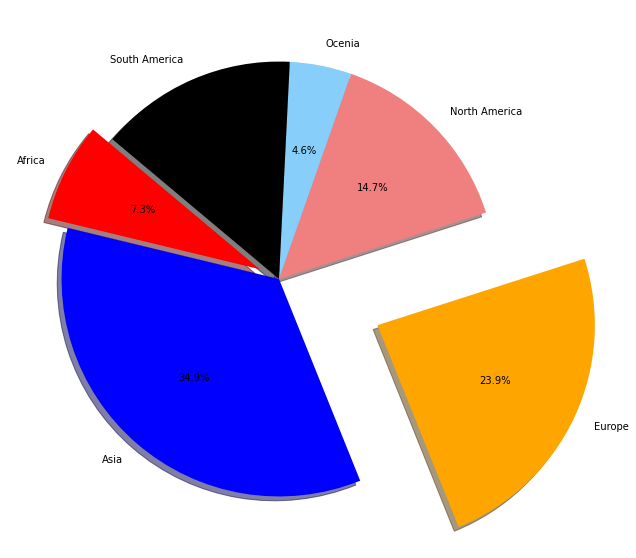

In [ ]:
# Tells matplotlib to seperate the "Python" section from the others
labels = ["Africa","Asia","Europe","North America","Ocenia","South America"]
colors = ["red","blue","orange","lightcoral","lightskyblue","black"]
explode = (0.1, 0, 0.5, 0, 0, 0)
plt.pie(Continents_Counts, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140);

## Launch Sites Per Countries Analysis 

In [ ]:
# Directly reading the countries Column into a list
Countries = list(Launch_Sites_data[:,1])
# Checking how many values are in the list of countries
print(len(Countries))
# Printing the unique values from the the countries list
unique_countries = np.unique(Countries)
print(len(unique_countries))

110
44


In [ ]:
# Checking if there are unknown values in the countries column
Countries.count('')

1

In [ ]:
# Counting how many launch site each unique country has
countries_counts = []
for country in unique_countries:
  countries_counts.append(Countries.count(country))
print(countries_counts)

[1, 2, 9, 3, 3, 3, 6, 1, 1, 1, 1, 5, 1, 1, 1, 4, 1, 3, 1, 1, 1, 6, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 2, 2, 4, 9, 1, 1, 1, 4, 1, 2, 12]


### Countries with at least 2 Spaceports

In [ ]:
# Since we can see from the above list that most coutries have only one
# We can only plot those who at least have two launchsites
countries_counts_2 = []
for country in unique_countries:
    if Countries.count(country) >= 2:
        countries_counts_2.append(Countries.count(country))
    else:
        continue
print(countries_counts_2)

[2, 9, 3, 3, 3, 6, 5, 4, 3, 6, 2, 2, 3, 2, 2, 4, 9, 4, 2, 12]


### Countries with at least 3 Spaceports

In [ ]:
# We can further decrease the sample size to only countries with at least 3
# Launch sites
# Creating a separate list to store the country names
countries_counts_3 = []
countries_names_3 = []
threshold = 3
for country in unique_countries:
    if Countries.count(country) >= threshold:
      countries_counts_3.append(Countries.count(country))
      countries_names_3.append(country)
    else:
      continue
print(f"There are {len(countries_counts_3)} countries with at least {threshold} launch sites !")

There are 14 countries with at least 3 launch sites !


| Country       	| Launch Sites Counts 	|
|---------------	|---------------------	|
| Argentina     	| 9                   	|
| Australia     	| 3                   	|
| Brazil        	| 3                   	|
| Canada        	| 3                   	|
| China         	| 6                   	|
| Germany       	| 5                   	|
| India         	| 4                   	|
| Iran          	| 3                   	|
| Japan         	| 6                   	|
| Norway        	| 3                   	|
| Poland        	| 4                   	|
| Russia        	| 9                   	|
| Sweden        	| 4                   	|
| United States 	| 12                  	|

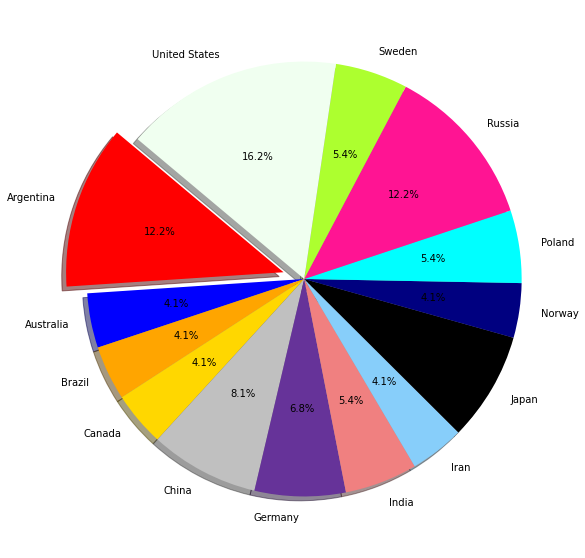

In [ ]:
# Tells matplotlib to seperate the "Python" section from the others
labels = countries_names_3
colors = ["red","blue","orange","gold","silver","rebeccapurple",
          "lightcoral","lightskyblue","black","navy","cyan",
          "deeppink","greenyellow","honeydew"]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(countries_counts_3, explode=explode, labels=labels, 
        colors=colors, autopct="%1.1f%%", shadow=True, startangle=140);

## Heaviest Rocket Launches Analysis

The 9th column in the dataset showns the heaviest rocket launched per launch site. This should be an important variable to confirm our hypothesis that the heavier rockets are launched as close to the equator.

In [ ]:
# Here we can get all the values in the Heaviest_Rocket_Launched column
Heaviest_Rocket_Launched = list(Launch_Sites_data[:, 8])
print(f"Total values in column : {len(Heaviest_Rocket_Launched)}")

# Printing the unique values from the the countries list
unique_Heaviest_Rocket_Launched = np.unique(Heaviest_Rocket_Launched)
print(f"Unique Heaviest Rocket Launched values : {len(unique_Heaviest_Rocket_Launched)}")

Total values in column : 110
Unique Heaviest Rocket Launched values : 36


In [ ]:
# Counting how many launch site each unique country has
heavy_rocket_launch_counts = []
for rocket in unique_Heaviest_Rocket_Launched:
    heavy_rocket_launch_counts.append(Heaviest_Rocket_Launched.count(rocket))
print(heavy_rocket_launch_counts)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 74]


When taking a look at the count values and see an outlier in the 74 value
as a data analyst it is understandable that the data might come is as incomplete
As taking a look at the raw data there are several "unkown" mispelled unknown
values therefore I will do a check on how many those are in order to confirm.

In [ ]:
Heaviest_Rocket_Launched.count('Unkown')

74

In [ ]:
# Removing the 74 value out of the list of counts
heavy_rocket_launch_counts.remove(74)
print(heavy_rocket_launch_counts)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Highest achieved Orbit Analysis

In [ ]:
# Directly reading the countries Column into a list
Highest_achieved_orbit = list(Launch_Sites_data[:,9])

# Checking how many values are in the Highest_achieved_orbit
print(len(Highest_achieved_orbit))

# Printing the unique values from the the countries list
unique_Highest_achieved_orbit = np.unique(Highest_achieved_orbit)
print(len(unique_Highest_achieved_orbit))

110
9


In [ ]:
for rocket in unique_Heaviest_Rocket_Launched:
    print(rocket)
#print(heavy_rocket_launch_counts)

NameError: ignored

In [ ]:
# Here we are checking the frequecies of each highest achieved orbit
unique, counts = np.unique(Highest_achieved_orbit, return_counts=True)
orbit_frequencies = np.asarray((unique, counts)).T

for row in orbit_frequencies:
  print('\t'.join(map(str, row)))

	1
1000 km  	1
1100 km  	1
956 km  	1
Interplanetary  	6
Lunar  	3
Orbital  	27
Suborbital	13
Unkown	57


## Interactive Map

The interactive map below was created from latitude and longitude values using the Tableau Public software obtained from Wikipedia's list of Rocket Launch Sites page [4]. This is a simple bubble heat map that has the geographic locations of all the launch sites in the world and the which had the most Rocket Launches. If you hover over individual bubbles you can see a field for the year that individual Launch site and a total number of rocket launch sites. During the business case study, the team can do further research on the cost of operabilition for each location and find out the reasons for some of them closing or still operating. Conclusions made will either make a case for or against Spaceport at an Equatorial location. For example, if we look at Spaceports in the Western Hemisphere, the White Sands Missile Range in New Mexico has over 7000 rocket launches to date but it's latitudinal location is at 32 degrees. On the other hand, the Guiana Space center with a latitudinal location of 5.2 only has 200 launches. Why is there such a huge difference in the two ? Maybe specific rockets for specific target orbits are being launched from one location compared to another ? Also if we take a look at the Peenemünde/Greifswalder Oie (54 degrees latitude), was launched from 3000 times. How is this number so high for a Spaceport so far from the Equator ?   Intuitively, one can also ask why it closed in 1945 while being used so frequently at such a early time in Spaceflight ? Was the reason it close an economic factor or other ? Keeping such questions in mind should help in the aid in the formation of further analysis.

Link: [Launch Site Analysis](https://public.tableau.com/profile/gael.gatera#!/vizhome/LaunchSiteAnalysis/Sheet1)

# Data Source 2 - Union For Concerned Scientists

This is an in-depth databse built by experts at UCS detailing the over 2,218 satellites currently orbiting Earth, including their country of origin, purpose, and other operational details. It is available as a downloadable Excel file, which is updated roughly quarterly. The databse will be used to collect open-source information on the operational specific satellites, their launch sites and other information that will be discussed in the sections below.

## First Look in Pandas

The database is downloaded as an excel workbook but had to be converted to a Pandas dataframe which is is a 2-dimensional labeled data structure with columns of potentially different types. Dataframes are great ways to perform operations on rows and columns and is widely used in Data Science statistical analysis of all sorts. We will use the Pandas library to create our dataframe and perform queries for the data that we need.

In [4]:
# Install the gspread library to access google spreadsheets in colab
!pip install --upgrade --quiet gspread

In [6]:
import pandas as pd

# Reading in Database from Union of Concerned Scientist for Analysis
Union_Concerned_Scientist_xlx = All_Data + '/UCS-Satellite-Database-10-1-Cleaned.xlsx'
Union_Concerned_Scientist_csv = All_Data + '/UCS-Satellite-Database-10-1-Cleaned.csv'

UCS_df = pd.read_excel(Union_Concerned_Scientist_xlx)
UCS_df.shape

(2218, 28)

In [ ]:
price_df.pivot(index='date', columns='ticker', values='open')

In [7]:
UCS_df.head(5)

,"Name of Satellite, Alternate Names",Country/Org of UN Registry,Country of Operator/Owner,Operator/Owner,Users,Purpose,Detailed Purpose,Class of Orbit,Type of Orbit,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Dry Mass (kg.),Power (watts),Date of Launch,Expected Lifetime (yrs.),Contractor,Country of Contractor,Launch Site,Launch Vehicle,COSPAR Number,NORAD Number,Comments,Source Used for Orbital Data
0,3Cat-1,NR,Spain,Universitat Politècnica de Catalunya,Civil,Technology Development,NaN,LEO,NaN,0.0,476,500,0.001750,97.40,95.00,4.0,NaN,NaN,2018-11-29,NaN,Universitat Politècnica de Catalunya,Spain,Satish Dhawan Space Centre,PSLV,2018-096K,43728,Student built.,Estimated
1,Aalto-1,Finland,Finland,University of Aalto,Civil,Technology Development,NaN,LEO,NaN,0.0,497,517,0.001454,97.45,94.70,4.5,NaN,4.5,2017-06-23,2.0,University of Aalto,Finland,Satish Dhawan Space Centre,PSLV,2017-036L,42775,Technology development and education.,JMSatcat/10_17
2,AAUSat-4,Denmark,Denmark,University of Aalborg,Civil,Earth Observation,Automatic Identification System (AIS),LEO,Sun-Synchronous,0.0,442,687,0.017665,98.20,95.90,1.0,NaN,NaN,2016-04-25,NaN,University of Aalborg,Denmark,Guiana Space Center,Soyuz 2.1a,2016-025E,41460,Carries AIS system.,Space50
3,"ABS-2 (Koreasat-8, ST-3)",NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,75.0,35778,35793,0.000178,0.08,1436.03,6330.0,NaN,16000,2014-02-06,15.0,Space Systems/Loral,USA,Guiana Space Center,Ariane 5 ECA,2014-006A,39508,"32 C-band, 51 Ku-band, and 6 Ka-band transpond...",ZARYA
4,ABS-2A,NR,Multinational,Asia Broadcast Satellite Ltd.,Commercial,Communications,NaN,GEO,NaN,-75.0,35700,35700,0.000000,0.00,1436.10,1800.0,NaN,NaN,2016-06-15,15.0,Boeing Satellite Systems,USA,Cape Canaveral,Falcon 9,2016-038A,41588,NaN,Estimated


### Pandas.Info

In [ ]:
UCS_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Name of Satellite, Alternate Names  2218 non-null   object        
 1   Country/Org of UN Registry          2218 non-null   object        
 2   Country of Operator/Owner           2218 non-null   object        
 3   Operator/Owner                      2218 non-null   object        
 4   Users                               2218 non-null   object        
 5   Purpose                             2218 non-null   object        
 6   Detailed Purpose                    854 non-null    object        
 7   Class of Orbit                      2218 non-null   object        
 8   Type of Orbit                       1594 non-null   object        
 9   Longitude of GEO (degrees)          2216 non-null   float64       
 10  Perigee (km)            

### Pandas.Describe

In [ ]:
# Quick statistical description of numerical values.
UCS_df.describe()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.),NORAD Number
count,2216.000000,2218.000000,2218.000000,2218.000000,2218.000000,2218.000000,2051.000000,1141.000000,2218.000000
mean,5.643100,10728.768711,12183.392696,0.016083,60.509225,508.050406,1504.130804,9.969544,39015.945897
std,47.689443,15347.973916,20388.299337,0.098612,40.543308,713.712788,2138.592316,4.979366,5806.790874
min,-179.800000,200.000000,300.000000,0.000000,0.000000,90.520000,1.000000,0.250000,7530.000000
25%,0.000000,500.000000,541.500000,0.000289,6.120000,95.200000,6.000000,5.000000,37234.750000
50%,0.000000,634.500000,703.000000,0.000903,74.050000,98.000000,447.000000,10.000000,41182.500000
75%,0.000000,35314.250000,35786.000000,0.001454,97.500000,1434.865000,2497.500000,15.000000,43221.500000
max,328.500000,62200.000000,330000.000000,0.957119,143.400000,11520.000000,18000.000000,30.000000,53160.000000


### Unique Values in each Column

In [8]:
for column in list(UCS_df.columns):
  print(f"Column -- {column} -- has *** {len(UCS_df[column].unique())} *** amount of unique values")

Column -- Name of Satellite, Alternate Names -- has *** 2212 *** amount of unique values
Column -- Country/Org of UN Registry -- has *** 58 *** amount of unique values
Column -- Country of Operator/Owner -- has *** 99 *** amount of unique values
Column -- Operator/Owner -- has *** 515 *** amount of unique values
Column -- Users -- has *** 17 *** amount of unique values
Column -- Purpose -- has *** 24 *** amount of unique values
Column -- Detailed Purpose -- has *** 32 *** amount of unique values
Column -- Class of Orbit -- has *** 4 *** amount of unique values
Column -- Type of Orbit -- has *** 9 *** amount of unique values
Column -- Longitude of GEO (degrees) -- has *** 461 *** amount of unique values
Column -- Perigee (km) -- has *** 681 *** amount of unique values
Column -- Apogee (km) -- has *** 673 *** amount of unique values
Column -- Eccentricity -- has *** 1370 *** amount of unique values
Column -- Inclination (degrees) -- has *** 403 *** amount of unique values
Column -- Perio

In [9]:
UCS_df.isnull().sum()

Name of Satellite, Alternate Names       0
Country/Org of UN Registry               0
Country of Operator/Owner                0
Operator/Owner                           0
Users                                    0
Purpose                                  0
Detailed Purpose                      1364
Class of Orbit                           0
Type of Orbit                          624
Longitude of GEO (degrees)               2
Perigee (km)                             0
Apogee (km)                              0
Eccentricity                             0
Inclination (degrees)                    0
Period (minutes)                         0
Launch Mass (kg.)                      167
Dry Mass (kg.)                        1756
Power (watts)                         1602
Date of Launch                           0
Expected Lifetime (yrs.)              1077
Contractor                               0
Country of Contractor                    0
Launch Site                              0
Launch Vehi

## Country/Org of UN Registry - Analysis

In [10]:
UCS_df["Country/Org of UN Registry"].value_counts()

USA                     704
NR                      354
NR (11/19)              269
China                   238
Russia                  157
Japan                    71
France                   68
United Kingdom           58
India                    47
Germany                  31
ESA                      23
Canada                   21
Luxembourg               19
Australia                12
Brazil                   12
South Korea              12
Saudi Arabia             11
Italy                     8
Norway                    8
United Arab Emirates      7
Belgium                   6
Indonesia                 6
EUMETSAT                  6
Mexico                    5
Algeria                   5
Uruguay                   5
Spain                     4
Denmark                   4
Finland                   4
Turkey                    3
Pakistan                  3
Argentina                 3
Malaysia                  3
Azerbaijan                2
Poland                    2
Nigeria             

## Users - Analysis

In [ ]:
UCS_df.Users.value_counts()

Commercial                        1033
Government                         419
Military                           331
Civil                              151
Government/Commercial              112
Military/Commercial                 75
Military/Government                 49
Government/Civil                    28
Government/Military                  5
Military/Civil                       5
Civil/Government                     3
Commercial/Military                  2
Military                             1
Commercial                           1
Civil/Military                       1
Government/Commercial/Military       1
Commercial/Government                1
Name: Users, dtype: int64

Since this is a statistical description of the whole database, their values might not be of much significance at all. However, if we look at the max value for Launch Mass, we can see that the mass of the highest vehicle launched had a mass of 18,000 Kilograms. So it would be interest to know what that vehicle was, where it was launch from and other information that could be used in our study.

In [ ]:
Unique_Purposes = list(UCS_df.Purpose.unique())

In [12]:
UCS_df.groupby("Country of Operator/Owner").median()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.),NORAD Number
Country of Operator/Owner,,,,,,,,,
Algeria,0.000,661.0,698.0,0.000997,98.200,98.30,117.0,5.0,41786.0
Argentina,0.000,598.5,650.5,0.001384,97.350,97.35,35.0,15.0,40606.5
Australia,147.500,35758.0,35786.0,0.000374,0.060,1435.40,2350.0,15.0,41367.0
Austria,0.000,770.0,784.0,0.000979,98.600,100.30,14.0,NaN,39091.0
Azerbaijan,45.500,35764.0,35772.0,0.000095,0.030,1436.09,3375.0,15.0,41355.5
...,...,...,...,...,...,...,...,...,...
United Arab Emirates,22.065,35753.5,35793.5,0.000655,4.415,1435.96,4487.5,12.0,38832.0
United Kingdom,0.000,8062.0,8069.0,0.000391,0.120,287.92,650.0,15.0,40350.0
United Kingdom/ESA,25.000,35786.0,35787.0,0.000012,0.020,1436.09,6650.0,15.0,39215.0


In [13]:
UCS_df.groupby("Country of Operator/Owner").mean()

,Longitude of GEO (degrees),Perigee (km),Apogee (km),Eccentricity,Inclination (degrees),Period (minutes),Launch Mass (kg.),Expected Lifetime (yrs.),NORAD Number
Country of Operator/Owner,,,,,,,,,
Algeria,-4.960000,7676.800000,7706.800000,0.001490,78.548000,365.740000,1117.000000,7.500000,41039.400000
Argentina,-10.914286,5602.500000,5651.000000,0.003311,75.116429,288.002857,654.416667,11.666667,37752.714286
Australia,90.262500,21075.000000,21125.583333,0.002799,38.544167,877.497500,2344.166667,13.750000,38845.750000
Austria,0.000000,770.000000,784.000000,0.000979,98.600000,100.300000,14.000000,NaN,39091.000000
Azerbaijan,45.500000,35764.000000,35772.000000,0.000095,0.030000,1436.090000,3375.000000,15.000000,41355.500000
...,...,...,...,...,...,...,...,...,...
United Arab Emirates,27.853750,22563.500000,22593.750000,0.000719,37.746250,933.515000,3351.250000,11.800000,38019.125000
United Kingdom,8.174921,14698.857143,14717.650794,0.000659,32.992063,603.917302,1606.225806,12.400000,38652.952381
United Kingdom/ESA,25.000000,35786.000000,35787.000000,0.000012,0.020000,1436.090000,6650.000000,15.000000,39215.000000


In [15]:
UCS_df.groupby("Country of Operator/Owner").describe()

Longitude of GEO (degrees)  ... NORAD Number
                                               count  ...          max
Country of Operator/Owner                             ...             
Algeria                                          5.0  ...      43039.0
Argentina                                       14.0  ...      43641.0
Australia                                       12.0  ...      43809.0
Austria                                          1.0  ...      39091.0
Azerbaijan                                       2.0  ...      43632.0
...                                              ...  ...          ...
United Arab Emirates                             8.0  ...      43676.0
United Kingdom                                  63.0  ...      44115.0
United Kingdom/ESA                               1.0  ...      39215.0
Venezuela                                        3.0  ...      42954.0
Vietnam                                          4.0  ...      43935.0

[99 rows x 72 columns]

In [ ]:
# Grouped by users and counting by countries (this would show which use is more popular in each country)
UCS_Country_Purpose_groups = UCS_df.groupby(["Country of Operator/Owner", "Purpose"])
print(f"This Groupby Created {len(UCS_Country_Purpose_groups)} unique Country of Operator/Owner vs Purpose Pairs")

This Groupby Created 220 unique Country of Operator/Owner vs Purpose Pairs


In [ ]:
counter = 0

for purpose in Unique_Purposes:
  try:
    print(UCS_Country_Purpose_groups.get_group(('Algeria', purpose)).head(5))
    counter += 1
  except KeyError:
    continue

print(counter)

   Name of Satellite, Alternate Names  ... Source Used for Orbital Data
51                           AlSat-1N  ...               JMSatcat/12_16

[1 rows x 28 columns]
   Name of Satellite, Alternate Names  ...   Source Used for Orbital Data
49                           Alsat 2B  ...                 JMSatcat/12_16
50                           Alsat-1B  ...                 JMSatcat/12_16
52    Alsat-2A (Algeria Satellite 2A)  ...  www.satellitedebris.net 12/12

[3 rows x 28 columns]
              Name of Satellite, Alternate Names  ... Source Used for Orbital Data
45  Alcomsat (Algerian Communications Satellite)  ...                   JMGEO/3_18

[1 rows x 28 columns]
3


In [ ]:
ucs_operator_user = UCS_df.groupby(["Country of Operator/Owner"])["Users"].count()
ucs_data_top_operators = ucs_operator_user.sort_values(axis=0, ascending=False)
ucs_data_top_operators.head(10)

Country of Operator/Owner
USA               988
China             320
Russia            161
Japan              78
Multinational      64
United Kingdom     63
India              57
ESA                50
Canada             39
Germany            36
Name: Users, dtype: int64

In [ ]:
ucs_un_reg_user = UCS_df.groupby(["Country/Org of UN Registry"])["Users"].count()
ucs_data_top_unreg = ucs_un_reg_user.sort_values(axis=0, ascending=False)
ucs_data_top_unreg.head(10)

Country/Org of UN Registry
USA               704
NR                354
NR (11/19)        269
China             238
Russia            157
Japan              71
France             68
United Kingdom     58
India              47
Germany            31
Name: Users, dtype: int64

In [ ]:
grouped = UCS_df.groupby(['Launch Mass (kg.)', 'Name of Satellite, Alternate Names'])

In [ ]:
grouped.last()

Country/Org of UN Registry  ... Source Used for Orbital Data
Launch Mass (kg.) Name of Satellite, Alternate Names                                             ...                             
1.0               AAUSat-4                                                              Denmark  ...                      Space50
                  Beesat-9 (Tubsat-17)                                                  Germany  ...               JMSatcat/11_19
                  BisonSat (Nwist Qwiqway)                                                   NR  ...                     JM/12_15
                  Duchifat-1                                                                 NR  ...                          NaN
                  Exoconnect (D-Star One)                                            NR (11/19)  ...               JMSatcat/11_19
...                                                                                         ...  ...                          ...
14500.0           Lacrosse/Onyx 5 (Lacrosse-5, NROL 16, USA 182)                            USA  ...                    SC - ASCR
18000.0           Keyhole 5 (Advanced KH-11, KH-12-5, Improved Cr...                        USA  ...                         JMSR
                  Keyhole 6 (NRO L49, Advanced KH-11, KH-12-6, Im...                        USA  ...               JMSatcat/2_USA
                  Keyhole 7 (NRO L65, Advanced KH-11, Improved Cr...                        USA  ...                        ZARYA
                  Keyhole 8 (NRO L71, Advanced KH-11, Improved Cr...                 NR (11/19)  ...                JMSatcat/3_19

[2046 rows x 26 columns]

In the above results we can see that a total of four satellites had a Launch Mass of 18000 kilograms and had similar characteristics. All four were Military Satellites Launched by the United States, all found were Earth Obvservation Satellites, all four were Launched to Lower Earth Orbit, so on and so on. So this means that as we progress in our feasiblity study we can make a case for Military Vehicles as the number one source of potential revenue since they tend to launch heavier vehicles and would benefit the most from the cost savings associated with launching from an Equatorial location. Again, this is simply an example of the versatility that using Python and associated libraries for analytical purposes can help us out.

## Frequently used Launch Sites

In order to compare our theoretical spaceport to others, I would be interesting to see which are the most frequently used launch sites in the database that we loaded in and see their geographic locations in the map that we generated above.

In [ ]:
# Doing a value count of all 
# launches per Launch site 
UCS_df['Launch Site'].value_counts()

Satish Dhawan Space Centre              311
Cape Canaveral                          311
Baikonur Cosmodrome                     294
Guiana Space Center                     273
Vandenberg AFB                          245
Jiuquan Satellite Launch Center         140
Plesetsk Cosmodrome                     107
Xichang Satellite Launch Center         106
Taiyuan Launch Center                    86
Vostochny Cosmodrome                     64
Dombarovsky Air Base                     57
Tanegashima Space Center                 43
International Space Station              33
Rocket Lab Launch Complex 1              32
Sea Launch Odyssey                       28
Wallops Island Flight Facility           27
International Space Station - Cygnus     12
Uchinoura Space Center                   10
Orbital ATK L-1011                        8
Cygnus                                    8
Yellow Sea Launch Platform                7
Palmachim Launch Complex                  5
Kodiak Launch Complex           

We see that within the top five most used Launch pads there is one that has a position of 45 degree latitude (Baikonur Cosmodrome) in Kazakhstan used by the Russians. So this would be a case against our equatorial launch site. In thing to ask ourselves is which satelittes did they launching from the mentioned location which Launch Masses, what were the target orbits, so on and so on. More in depth analysis can be made which would answer those questions.

## Frequent Users and Country of Origin
Other points can be made about the most frequent users of Satellites according to the data gathered in this database. In the below query we can see that commercial vehicles are commercial satellites are an overwhelming majority with 1033 satellites. Futher analysis can be made to know which are the heaviest vehicles and where they were launched from to make a case for a potential cost savings for using the East African Spaceport as a solution.

In [ ]:
#Grouped by users and counting by countries (this would show which use is more popular in each country)
ucs_date_countries = UCS_df.groupby(["Users"])["Country/Org of UN Registry"].count()
ucs_date_countries

Users
Civil                              151
Civil/Government                     3
Civil/Military                       1
Commercial                        1033
Commercial                           1
Commercial/Government                1
Commercial/Military                  2
Government                         419
Government/Civil                    28
Government/Commercial              112
Government/Commercial/Military       1
Government/Military                  5
Military                           331
Military                             1
Military/Civil                       5
Military/Commercial                 75
Military/Government                 49
Name: Country/Org of UN Registry, dtype: int64

## Launch Mass vs Longitude Scatter Plot

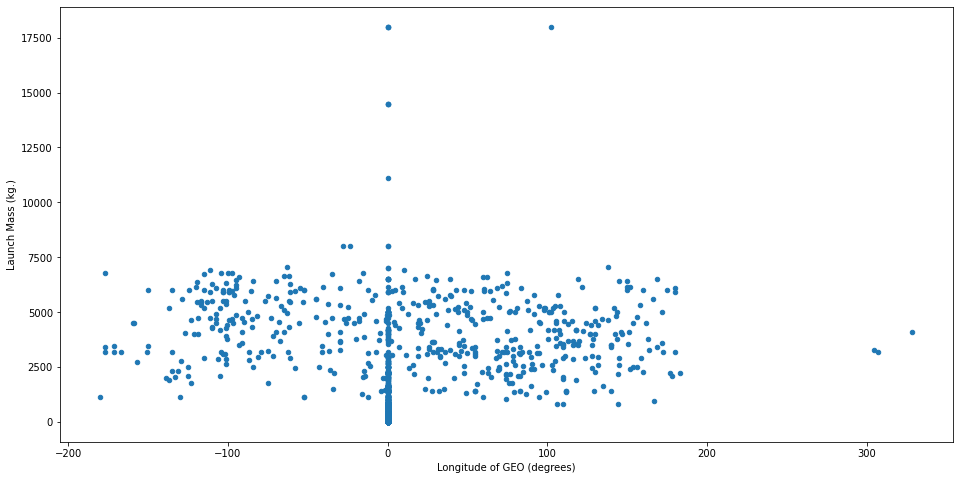

In [ ]:
UCS_df.plot(kind='scatter', x='Longitude of GEO (degrees)', y='Launch Mass (kg.)', figsize=(16,8))

 # Data Source 3 - Space X API (Application Program Interface)


The SpaceX API is a central location for information of most if not all things related to Space X's missions, rockets and more. Subsequent sections will demonstrate how to extract information from this source. Further explanation of how application program interfaces work is outside the scope of this report but may be searched for individually. 


## End Point # 1 - Launches
https://api.spacexdata.com/v3/launches

In [ ]:
# This chunk of code will let us know in which form is the original data

url_launches = 'https://api.spacexdata.com/v3/launches'
launches_response = requests.get(url_launches).json()

#spacex = launches_response

In [ ]:
print(json.dumps(launches_response, indent=2))

[
  {
    "flight_number": 1,
    "mission_name": "FalconSat",
    "mission_id": [],
    "upcoming": false,
    "launch_year": "2006",
    "launch_date_unix": 1143239400,
    "launch_date_utc": "2006-03-24T22:30:00.000Z",
    "launch_date_local": "2006-03-25T10:30:00+12:00",
    "is_tentative": false,
    "tentative_max_precision": "hour",
    "tbd": false,
    "launch_window": 0,
    "rocket": {
      "rocket_id": "falcon1",
      "rocket_name": "Falcon 1",
      "rocket_type": "Merlin A",
      "first_stage": {
        "cores": [
          {
            "core_serial": "Merlin1A",
            "flight": 1,
            "block": null,
            "gridfins": false,
            "legs": false,
            "reused": false,
            "land_success": null,
            "landing_intent": false,
            "landing_type": null,
            "landing_vehicle": null
          }
        ]
      },
      "second_stage": {
        "block": 1,
        "payloads": [
          {
            "payload_i

 ## Enpoint #2 - Launchpads

The basic url for this API is https://api.spacexdata.com/v3/, however different endpoints can be added to the url depending on the desired information. For example, in our case we will want the Launchpds field to know which launchpads where used by different Space X launch vehicles.

In [ ]:
import requests
import json

In [ ]:
url = "https://api.spacexdata.com/v3/launchpads"
print(requests.get(url))

<Response [200]>


In [ ]:
# This will convert values from the url into json format (key value pairs) so we can use python to do some analysis with !
r = requests.get(url)
pretty_json = json.loads(r.text)
print(json.dumps(pretty_json, indent=2))

[
  {
    "id": 5,
    "name": "VAFB SLC 3W",
    "status": "retired",
    "location": {
      "name": "Vandenberg Air Force Base",
      "region": "California",
      "latitude": 34.6440904,
      "longitude": -120.5931438
    },
    "vehicles_launched": [
      "Falcon 1"
    ],
    "attempted_launches": 0,
    "successful_launches": 0,
    "wikipedia": "https://en.wikipedia.org/wiki/Vandenberg_AFB_Space_Launch_Complex_3",
    "details": "SpaceX original west coast launch pad for Falcon 1. Performed a static fire but was never used for a launch and abandoned due to scheduling conflicts.",
    "site_id": "vafb_slc_3w",
    "site_name_long": "Vandenberg Air Force Base Space Launch Complex 3W"
  },
  {
    "id": 2,
    "name": "CCAFS SLC 40",
    "status": "active",
    "location": {
      "name": "Cape Canaveral",
      "region": "Florida",
      "latitude": 28.5618571,
      "longitude": -80.577366
    },
    "vehicles_launched": [
      "Falcon 9"
    ],
    "attempted_launches": 61,

In [ ]:
# This chunk of code will let us know in which form is the original data coming in the form as
response = requests.get(url).json()

# This piece of code iterations through the list of dictionaies (datatype) to get all the names of the launch pads used by SpaceX.
for i in response:
  if i['name']:
    print(i['name'])

VAFB SLC 3W
CCAFS SLC 40
STLS
Kwajalein Atoll
VAFB SLC 4E
KSC LC 39A


Here we see that Space X has only used 6 different Launch Pads:

1. VAFB SLC 3W - Vandenberg Air Force Base Space Launch Complex 3W
2. CCAFS SLC 40 - Cape Canaveral Air Force Station Space Launch Complex 40
3. STLS - SpaceX South Texas Launch Site
4. Kwajalein Atoll - Kwajalein Atoll Omelek Island
5. VAFB SLC 4E - Vandenberg Air Force Base Space Launch Complex 4E
6. KSC LC 39A - Kennedy Space Center Historic Launch Complex 39A

One thing to note is that the South Texas Launch site is not found in the data scrapped from Wikipedia, therefore hurting the credibility of it as a reliable source of data. A better map with more complete information may be created in later stages of the project.

In [ ]:
# We can also create another request to get information on a specific launchpad
response_ksc_lc39a = requests.get(url + "/ksc_lc_39a").json()
print(json.dumps(response_ksc_lc39a, indent=4, sort_keys=True))

{
    "attempted_launches": 20,
    "details": "NASA historic launch pad that launched most of the Saturn V and Space Shuttle missions. Initially for Falcon Heavy launches, it is now launching all of SpaceX east coast missions due to the damage from the AMOS-6 anomaly. After SLC-40 repairs are complete, it will be upgraded to support Falcon Heavy, a process which will take about two months. In the future it will launch commercial crew missions and the Interplanetary Transport System.",
    "id": 4,
    "location": {
        "latitude": 28.6080585,
        "longitude": -80.6039558,
        "name": "Cape Canaveral",
        "region": "Florida"
    },
    "name": "KSC LC 39A",
    "site_id": "ksc_lc_39a",
    "site_name_long": "Kennedy Space Center Historic Launch Complex 39A",
    "status": "active",
    "successful_launches": 20,
    "vehicles_launched": [
        "Falcon 9",
        "Falcon Heavy"
    ],
    "wikipedia": "https://en.wikipedia.org/wiki/Kennedy_Space_Center_Launch_Comple

In [ ]:
# Specific information within each dictionary can be access as keys
response_ksc_lc39a['details']

'NASA historic launch pad that launched most of the Saturn V and Space Shuttle missions. Initially for Falcon Heavy launches, it is now launching all of SpaceX east coast missions due to the damage from the AMOS-6 anomaly. After SLC-40 repairs are complete, it will be upgraded to support Falcon Heavy, a process which will take about two months. In the future it will launch commercial crew missions and the Interplanetary Transport System.'

## Rockets Endpoint 
In this section we will access a different endpoint within the SpaceX API to find out more information out rockets that are manufactured by Space X. Here we will do separate queries for the Falcon 9 rocket.

In [ ]:
# Performing a GET Request and saving the 
# API's response within a variable
url = "https://api.spacexdata.com/v2/rockets/falcon9"
response = requests.get(url)
response_json = response.json()
type(response_json)

print(json.dumps(response_json, indent=4, sort_keys=True))

{
    "active": true,
    "boosters": 0,
    "company": "SpaceX",
    "cost_per_launch": 50000000,
    "country": "United States",
    "description": "Falcon 9 is a two-stage rocket designed and manufactured by SpaceX for the reliable and safe transport of satellites and the Dragon spacecraft into orbit.",
    "diameter": {
        "feet": 12,
        "meters": 3.7
    },
    "engines": {
        "engine_loss_max": 2,
        "isp": {
            "sea_level": 288,
            "vacuum": 312
        },
        "layout": "octaweb",
        "number": 9,
        "propellant_1": "liquid oxygen",
        "propellant_2": "RP-1 kerosene",
        "thrust_sea_level": {
            "kN": 845,
            "lbf": 190000
        },
        "thrust_to_weight": 180.1,
        "thrust_vacuum": {
            "kN": 914,
            "lbf": 205500
        },
        "type": "merlin",
        "version": "1D+"
    },
    "first_flight": "2010-06-04",
    "first_stage": {
        "burn_time_sec": 162,
       

In [ ]:
# Here we are grabbing a specific value from the dictionary. An interesting fact to know is the average cost per launch of the Falcon 9 in general.
print(response_json["cost_per_launch"])

50000000


Interesting fact to note for the future analysis and data gathered either from this source others.

In [ ]:
# Here we can take a look at the number of payloads that the falcon 9 can carry using the only available field 
# relating to payloads....the 'payload weights' key

number_payloads = len(response_json["payload_weights"])
print(f"There are {number_payloads} payloads.")

There are 3 payloads.


In [ ]:
# Referencing the values stored within sub-dictionaries and sub-lists
payload_weight = response_json["payload_weights"][0]["kg"]
print(f"The first payload weighed {payload_weight} Kilograms")

The first payload weighed 22800 Kilograms


# Geospatial Data

[link text](https:// [link text](https://))

https://towardsdatascience.com/how-to-work-with-big-geospatial-data-4ba919a8ffc2

https://www.ogc.org/blog/1866


# Conlusion

This uninformal proposal was written using Google Colab, a product of Jupyter notebook and Google Drive products to help developers colaborate on projects such as these with efficiency and removing the need to constantly email latest version of code. This is not as in depth as Git products and their version control capabilities enabled by pushes and pulls but for the purpose of simple analysis that will not be needed. Some of the mentioned points will be explored further and more robust analysis can be done using charts and other methodologies.

### References

[1] Dr. Obadiah Kegege, Dr. Ousmane N. Diallo, Enanga D. Fale, Aisha R. Bowe (2013). NSBE Aerospace Special Interest Group: <i> EAC Spaceport Feasiblity Study,</i> Retrieved from: https://www.nsbe-aerospace.org/ </p>

[2] https://docs.microsoft.com/en-us/azure/architecture/data-guide/relational-data/etl

[3] https://en.wikipedia.org/wiki/List_of_rocket_launch_sites

[4] https://www.ucsusa.org/resources/satellite-database#:~:text=Assembled%20by%20experts%20at%20the,currently%20in%20orbit%20around%20Earth.

[5] https://docs.spacexdata.com/

[6] https://planet4589.org/space/log/launch.html

[3] r/Spacex (Version 3.1.0), Project_name:", <i> "SpaceX-API" </i>docs: https://documenter.getpostman.com/view/2025350/RWaEzAiG, organization_link:https://github.com/r-spacex, description: Open Source REST API for rocket, core, capsule, pad, and launch data, created and maintained by the developers of the r/SpaceX organization.</p>


# Launch Logs


In [ ]:
print(launch_log_file)

drive/My Drive/Data Science Lifecycle in the Aerospace Industry/Data/Launch Sites-Wiki.csv


In [ ]:
launch_log_file = Data + '/Launch Sites-Wiki.xlsx'
launchFiles = pd.read_excel(launch_log_file)
launchFiles.head(100)

,Continent,Country,Location,Latitude,Longitute,Year Opened,Year Closed,Number of rocket launches,Heaviest rocket launched,Highest achieved Orbit
0,Africa,Algeria,"Hammaguira French Special Weapons Test Centre,...",31.09951,-2.83581,1947,1967,Unkown,18000,Orbital
1,Africa,Algeria,Reggane,26.71895,0.27691,1961,1965,10,Unkown,Unkown
2,Africa,Congo DRC,"Shaba North, Kapani Tonneo OTRAG Launch Center",-7.92587,28.52766,1977,1978,3,Unkown,Suborbital
3,Africa,Egypt,Jabal Hamzah ballistic missile test and launch...,30.12575,30.60514,1950,Operational,6,Unkown,Unkown
4,Africa,Kenya,"Broglio Space Centre (San Marco), Malindi",-2.94080,40.21340,1964,1994,27,20000,Orbital
...,...,...,...,...,...,...,...,...,...,...
95,South America,Argentina,Villa Reynolds,33.72460,-65.37730,1973,1973,2,Unkown,Unkown
96,South America,Argentina,Pampa de Achala,31.58330,-64.83330,1961,1962,8,28,Suborbital
97,South America,Brazil,Natal/Barreira,5.86600,-35.38300,1965,Operational,233,Unkown,1100 km
98,South America,Brazil,Praia do Cassino,32.08338,-52.16725,1966,1966,27,Unkown,Unkown
